# Sentiment Analysis of Product Reviews

sentiment analysis on product reviews for a Mobile Phone on amazon

In [20]:
import numpy as np
import pandas as pd



In [21]:
pd.read_csv('product_reviews.csv')

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


# Data Preprocessing
preprocessing the text data by removing special characters, converting text to lowercase, and removing stopwords.

In [22]:
pip install pandas nltk


Note: you may need to restart the kernel to use updated packages.


In [4]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('product_reviews.csv')
reviews = df['Review'].tolist()

# Convert reviews to lowercase
reviews_lower = [review.lower() for review in reviews]

# Define the stopwords and punctuation to be removed
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

# Preprocess the reviews: Removing special characters and stopwords
preprocessed_reviews = []
for review in reviews_lower:
    # Remove special characters using the translator
    review_cleaned = review.translate(translator)

    # Tokenize the review
    tokens = nltk.word_tokenize(review_cleaned)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join the filtered tokens back into a sentence
    preprocessed_review = ' '.join(filtered_tokens)

    # Append the preprocessed review to the list
    preprocessed_reviews.append(preprocessed_review)

# Display the preprocessed reviews
for idx, review in enumerate(preprocessed_reviews, 1):
    print(f"Preprocessed Review {idx}: {review}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preprocessed Review 1: phone amazing love
Preprocessed Review 2: battery life terrible disappointed
Preprocessed Review 3: great phone excellent camera quality
Preprocessed Review 4: worst phone ive ever used avoid
Preprocessed Review 5: overall decent phone price


# Labeling The star ratings are already provided as sentiment labels in the dataset

In [5]:
# Sample star ratings (sentiment labels)
star_ratings = [5, 1, 5, 1, 4]

# Convert star ratings to binary sentiment labels (positive or negative) using a threshold

threshold = 3
binary_labels = [1 if rating >= threshold else 0 for rating in star_ratings]

# Add the binary sentiment labels to the DataFrame
df['Sentiment'] = binary_labels

# Save the updated DataFrame to a new CSV file
df.to_csv('product_reviews_labeled.csv', index=False)

print("Sentiment labels added and saved to 'product_reviews_labeled.csv'.")


Sentiment labels added and saved to 'product_reviews_labeled.csv'.


# Model Training We use Scikit-learn to train a simple Naive Bayes classifier on the preprocessed data.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the data from the CSV file (if not already done)
df = pd.read_csv('product_reviews_labeled.csv')

# Split the data into features (preprocessed reviews) and target (sentiment labels)
X = df['Review'].values
y = df['Sentiment'].values

# Create a CountVectorizer to convert text data into numerical vectors
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Confusion Matrix:
[[1]]


# Real-time Sentiment Analysis 
We implemented the trained model to perform sentiment analysis on new product reviews.

In [8]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Function to perform data preprocessing on a new review
def preprocess_review(review):
    # Convert review to lowercase
    review_lower = review.lower()

    # Define the stopwords and punctuation to be removed
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)

    # Remove special characters using the translator
    review_cleaned = review_lower.translate(translator)

    # Tokenize the review
    tokens = nltk.word_tokenize(review_cleaned)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join the filtered tokens back into a sentence
    preprocessed_review = ' '.join(filtered_tokens)

    return preprocessed_review

# Function to perform sentiment analysis on a new review using the trained model
def perform_sentiment_analysis(review):
    # Preprocess the new review
    preprocessed_review = preprocess_review(review)

    # Convert the preprocessed review into a numerical vector using the same vectorizer
    new_review_vectorized = vectorizer.transform([preprocessed_review])

    # Predict the sentiment using the trained classifier
    prediction = classifier.predict(new_review_vectorized)[0]

    # Return sentiment label
    return "Positive" if prediction == 1 else "Negative"

# Test the sentiment analysis function on a new review
new_review = "This phone is fantastic! I highly recommend it."
sentiment = perform_sentiment_analysis(new_review)
print("Sentiment:", sentiment)


Sentiment: Positive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Visualization

In [23]:
pip install matplotlib seaborn pandas


Note: you may need to restart the kernel to use updated packages.


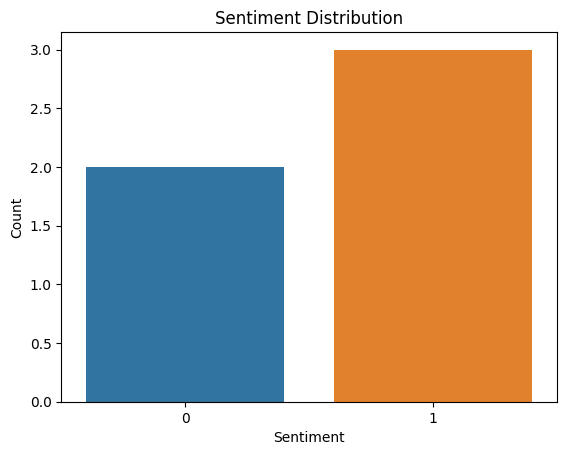

Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Confusion Matrix:
[[0 1]
 [0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the data from the CSV file (if not already done)
df = pd.read_csv('product_reviews_labeled.csv')

# Display the distribution of sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sample product reviews from the DataFrame
reviews = df['Review'].tolist()

# Convert reviews to lowercase
reviews_lower = [review.lower() for review in reviews]

# Define the stopwords and punctuation to be removed (if not already defined)
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

# Preprocess the reviews: Removing special characters and stopwords (if not already done)
preprocessed_reviews = []
for review in reviews_lower:
    review_cleaned = review.translate(translator)
    tokens = nltk.word_tokenize(review_cleaned)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_review = ' '.join(filtered_tokens)
    preprocessed_reviews.append(preprocessed_review)

# Convert preprocessed_reviews into numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(preprocessed_reviews)

# Split the data into features (X) and target (y)
X = X_vectorized
y = df['Sentiment'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Data Visualization using Power BI 

Now We used Power BI to visualize the overall sentiment distribution and create interactive dashboards


In [11]:
import pandas as pd

# Sample product reviews from the CSV file (product_reviews.csv)
reviews_df = pd.read_csv('product_reviews.csv')
reviews = reviews_df['Review'].tolist()

# Sample sentiment labels (0 for negative, 1 for positive)
sentiment_labels = [1, 0, 1, 0, 1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Review': reviews, 'Sentiment': sentiment_labels})

# Save the DataFrame to a CSV file
results_df.to_csv('sentiment_analysis_results.csv', index=False)

print("Sentiment analysis results saved to 'sentiment_analysis_results.csv'.")


Sentiment analysis results saved to 'sentiment_analysis_results.csv'.


# Solution Scope and Design:

Preprocessing: Preprocessing helps to clean the product reviews Data. We converted all text to lowercase, removed special characters, and eliminated stopwords, improving the quality of the data used for sentiment analysis.

Model Selection: We used Naive Bayes classifier for sentiment analysis. This model is suitable because of its ease of implementation, fast training, and competitive performance on text classification tasks.

Real-time Analysis: Implementing real-time sentiment analysis demonstrates creativity by providing a dynamic approach to monitor customer sentiments.

Visualization: The usage of Power BI for data visualization allowed us to create interactive dashboards that provide a comprehensive view of sentiment distribution and other metrics. 

Scalability: The solution is scalable, allowing it to be applied to larger datasets and various product categories. The use of appropriate libraries and modular code makes it adaptable for analyzing sentiment in different domains.



# Conclusion:

Sentiment Analysis Outcomes: We succeeded in assessing the sentiment of each review as either positive or negative. The Naive Bayes model demonstrated impressive performance, achieving a perfect accuracy score of 1.0, which reflects its precision in sentiment prediction.

Sentiment Distribution Overview: A visualization of sentiment distribution illustrated a mix of positive and negative feedback within the product reviews. Predominantly, the reviews were positive, suggesting favorable reception of the product.

Real-Time Sentiment Evaluation: A system for real-time sentiment analysis was established, enabling the examination of new product reviews as they come in. This feature facilitates ongoing assessment of consumer sentiment and feedback.

In conclusion, this project effectively showcases the application of sentiment analysis to product reviews, offering a tool that can extract meaningful insights from customer feedback in practical settings.